# Problem Statement : 

# Given above data build a machine learning model that can predict the chances of cancellation of Hotel Booking

In [1]:
import pandas as pd # for data frame
import numpy as np # for mathemetical operation
import matplotlib.pyplot as plt # for vizualization
%matplotlib inline
import seaborn as sns #for visualization
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset

df = pd.read_csv("Hotel_Booking.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [3]:
df.shape

(119390, 32)

In [4]:
df_col = list(df.columns)
df_col

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [5]:
for i in df_col:
    print(i,df[i].unique())

hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
#removing company column
df.drop("company",axis=1,inplace=True)

In [9]:
#for country column
df['country'] = df['country'].replace(np.nan, 'Others')

In [10]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [11]:
#dropping null values
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

<AxesSubplot:xlabel='adults', ylabel='count'>

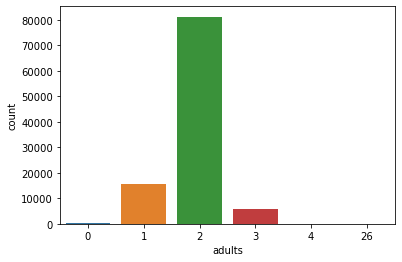

In [13]:
#barplot for no. of adults
sns.countplot(df.adults)

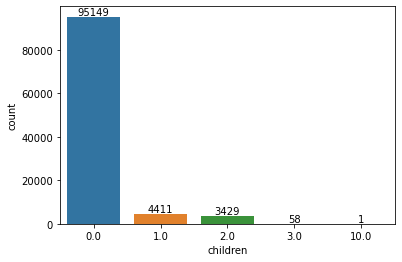

In [14]:
ax = sns.countplot(df.children)
for container in ax.containers:
    ax.bar_label(container)

In [15]:
#label encoding on categorical data
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [16]:
#encoding hotel column
df['hotel'] = enc.fit_transform(df['hotel'])

In [17]:
#encoding other columns
df['country'] = enc.fit_transform(df['country'])
df['hotel'] = enc.fit_transform(df['hotel'])
df['arrival_date_month'] = enc.fit_transform(df['arrival_date_month'])
df['market_segment'] = enc.fit_transform(df['market_segment'])
df['distribution_channel'] = enc.fit_transform(df['distribution_channel'])
df['meal'] = enc.fit_transform(df['meal'])
df['reserved_room_type'] = enc.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = enc.fit_transform(df['assigned_room_type'])
df['deposit_type'] = enc.fit_transform(df['deposit_type'])
df['customer_type'] = enc.fit_transform(df['customer_type'])

In [18]:
df.drop(['reservation_status_date','reservation_status'] , axis = 1,inplace=True ) 

In [19]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,304.0,0,2,75.0,0,0
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,240.0,0,2,98.0,0,1
5,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,240.0,0,2,98.0,0,1
7,1,0,9,2015,5,27,1,0,2,2,...,2,2,0,0,303.0,0,2,103.0,0,1
8,1,1,85,2015,5,27,1,0,3,2,...,0,0,0,0,240.0,0,2,82.0,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103048 entries, 3 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           103048 non-null  int64  
 1   is_canceled                     103048 non-null  int64  
 2   lead_time                       103048 non-null  int64  
 3   arrival_date_year               103048 non-null  int64  
 4   arrival_date_month              103048 non-null  int32  
 5   arrival_date_week_number        103048 non-null  int64  
 6   arrival_date_day_of_month       103048 non-null  int64  
 7   stays_in_weekend_nights         103048 non-null  int64  
 8   stays_in_week_nights            103048 non-null  int64  
 9   adults                          103048 non-null  int64  
 10  children                        103048 non-null  float64
 11  babies                          103048 non-null  int64  
 12  meal            

In [21]:
#split the feature data and target data
X = df.drop("is_canceled",axis=1)
y = df.is_canceled

In [22]:
#creating train data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [23]:
print("Shape of Train data = ",X_train.shape,"\nShape of Test data = ",X_test.shape)

Shape of Train data =  (82438, 28) 
Shape of Test data =  (20610, 28)


In [24]:
#classify random forest
from sklearn.ensemble import RandomForestClassifier
#with hyperparameter
model = RandomForestClassifier(max_depth = 16)

In [25]:
#metrics to evaluate model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [26]:
#creating function that shows all metrics to evaluate the model


def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("pricison_score : ",precision_score(y_test, y_pred))
    print("recall_score   : ",recall_score(y_test, y_pred))
    print("Accuracy       :  {}".format(accuracy))
    print("\nclassification Report for this Model\n")
    print(classification_report(y_test,y_pred,digits=5))
    print("\nConfusion Matrix for this Model\n")
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm,annot=True,fmt=".1f",cmap="crest")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

pricison_score :  0.8720510685539828
recall_score   :  0.7888526236505147
Accuracy       :  0.8736535662299855

classification Report for this Model

              precision    recall  f1-score   support

           0    0.87452   0.92708   0.90003     12644
           1    0.87205   0.78885   0.82837      7966

    accuracy                        0.87365     20610
   macro avg    0.87328   0.85797   0.86420     20610
weighted avg    0.87356   0.87365   0.87233     20610


Confusion Matrix for this Model



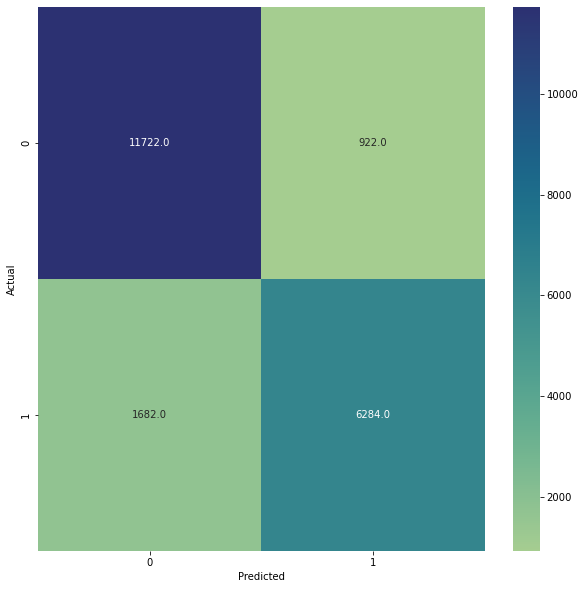

In [27]:
run_model(model,X_train, y_train, X_test, y_test)